In [1]:
%pip install seaborn
%pip install wordcloud
%pip install spacy
%pip install textstat

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
import pandas as pd
data_final = pd.read_csv('./data/4-final/combined_balanced_CEFR_sentences_augmented_A2_and_C2.csv')
data_C2_2 = pd.read_csv('./data/4-final/C2_sentences_test.csv')

data_C2_2['sentence_length'] = data_C2_2['sentence'].apply(lambda x: len(x.split()))

# Split data by difficulty
data_C2_1 = data_final[data_final['difficulty'] == 'C2']

data_C2 = pd.concat([data_C2_1, data_C2_2], ignore_index=True)

data_C2 = data_C2.drop_duplicates()

print(data_C2.shape)

data_C2["difficulty_reviewed"] = data_C2["difficulty"]

data_C2["text_id"] = "unknown"

print(data_C2['sentence_length'].unique()) 

# Display the value with nan
display(data_C2[data_C2['sentence_length'].isnull()])

# Convert sentence_length to int
#data_C2['sentence_length'] = data_C2['sentence_length'].astype(int)

display(data_C2.head())
print(data_C2.shape)

data_C2.to_csv('./data/2-reviewed-sentences/batches/batch_25_reviewed.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/4-final/combined_balanced_CEFR_sentences_augmented_A2_and_C2.csv'

# Loading data


In [2]:
import pandas as pd
import os

data_test = pd.read_csv('./data/french_difficulty_test.csv')
data_train = pd.read_csv('./data/french_difficulty_train.csv')

data = pd.concat([data_test, data_train], ignore_index=True)



## 1.1 Basic Statistics

#### Class Distribution:

Check how sentences are distributed across CEFR levels (you already did this).

difficulty
A1    800
A2    800
B1    800
B2    800
C1    800
C2    800
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution Over Reviewed Difficulty'}, xlabel='difficulty'>

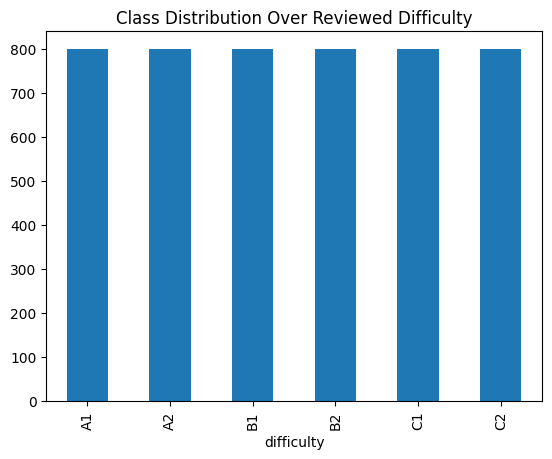

In [5]:
print(data['difficulty'].value_counts())

# bar plot sorted by difficulty
data["difficulty"].value_counts().plot(kind="bar", title="Class Distribution Over Reviewed Difficulty")

In [8]:
data["sentence_length"] = data["sentence"].apply(lambda x: len(x.split()))

            count      mean        std  min   25%   50%   75%    max
difficulty                                                          
A1          800.0   7.37625   4.403285  1.0   4.0   6.0   9.0   30.0
A2          800.0  11.42375   5.590909  2.0   8.0  10.0  14.0   39.0
B1          800.0  15.11000   7.651214  3.0  10.0  13.0  19.0   58.0
B2          800.0  19.08000  10.572172  1.0  11.0  17.0  25.0   81.0
C1          800.0  24.27125  12.475866  2.0  15.0  22.0  31.0   95.0
C2          800.0  31.32750  27.527940  4.0  16.0  25.0  35.0  265.0


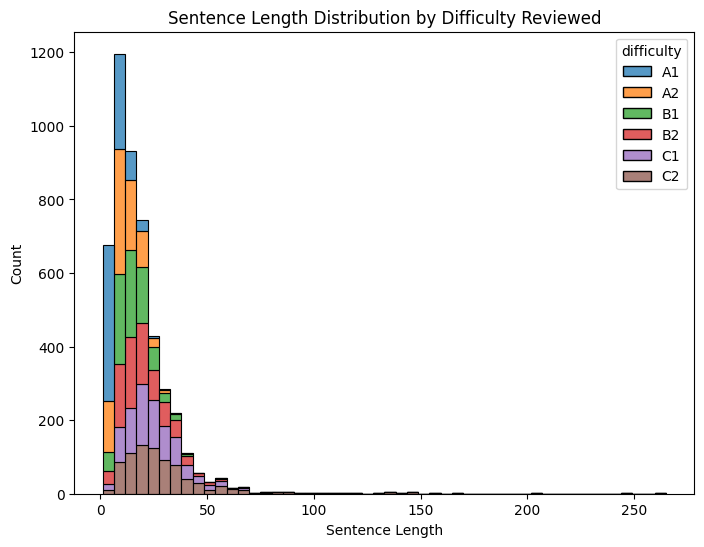

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
sentence_lenght_stats = data.groupby("difficulty")["sentence_length"].describe()
print(sentence_lenght_stats)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="sentence_length", hue="difficulty", bins=50, multiple="stack")
plt.title("Sentence Length Distribution by Difficulty Reviewed")
plt.xlabel("Sentence Length")
plt.ylabel("Count")
plt.show()


#### Word Count Distribution:

Visualize the distribution of sentence lengths for each CEFR level.

Text(0, 0.5, 'Sentence Length')

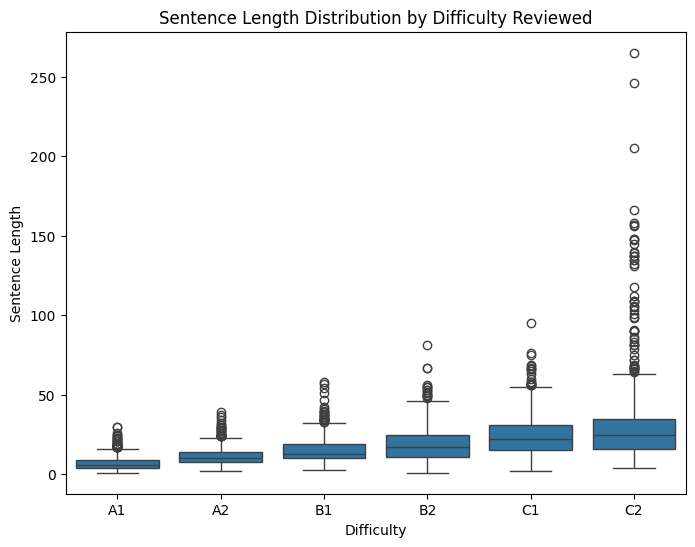

In [11]:
import seaborn as sns
#Order the data by difficulty
data_sorted = data.sort_values(by="difficulty")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_sorted, x="difficulty", y="sentence_length")
plt.title("Sentence Length Distribution by Difficulty Reviewed")
plt.xlabel("Difficulty")
plt.ylabel("Sentence Length")

#### Readability Score:

Measure readability using metrics like the Flesch Reading Ease (adapted for German).

In [13]:
from textstat import flesch_reading_ease

data["readability"] = data["sentence"].apply(flesch_reading_ease)
readability_stats = data.groupby("difficulty")["readability"].mean()
print(readability_stats)


difficulty
A1    90.691775
A2    87.360138
B1    78.848788
B2    60.992300
C1    54.945588
C2    50.108600
Name: readability, dtype: float64


#### Vocabulary Overlap:

Check how much overlap exists in the vocabulary between CEFR levels.

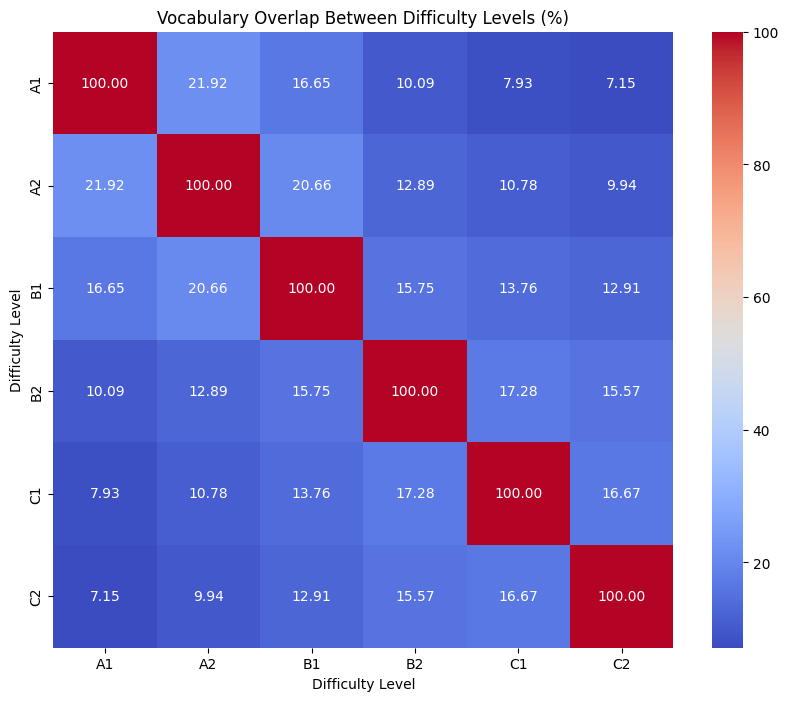

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get vocabulary from sentences
def get_vocab(sentences):
    return set(" ".join(sentences).split())

# Create vocabulary sets for each difficulty level
vocab_levels = {
    level: get_vocab(data[data["difficulty"] == level]["sentence"])
    for level in data["difficulty"].unique()
}

# Initialize a DataFrame to store overlap percentages
levels = list(vocab_levels.keys())
overlap_matrix = pd.DataFrame(index=levels, columns=levels, dtype=float)

# Calculate vocabulary overlaps
for level1, vocab1 in vocab_levels.items():
    for level2, vocab2 in vocab_levels.items():
        overlap = len(vocab1 & vocab2) / len(vocab1 | vocab2) * 100
        overlap_matrix.loc[level1, level2] = overlap

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Vocabulary Overlap Between Difficulty Levels (%)")
plt.xlabel("Difficulty Level")
plt.ylabel("Difficulty Level")
plt.show()


In [ ]:
# save the data
data.to_csv('./data/4-final/CEFR_GERMAN_sentences_labelled.csv', index=False)